# Regression model to predict second hand car price

### Importing libraries

In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

#overwriting sns
sns.set()

### Loading the dataset

In [26]:
#input dataset
dataset = pd.read_csv('1.04. Real-life example.csv')
dataset.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [27]:
#droping NaN and null values from the dataset
dataset = dataset.dropna(axis=0)

In [28]:
#summary and stats of the dataset
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


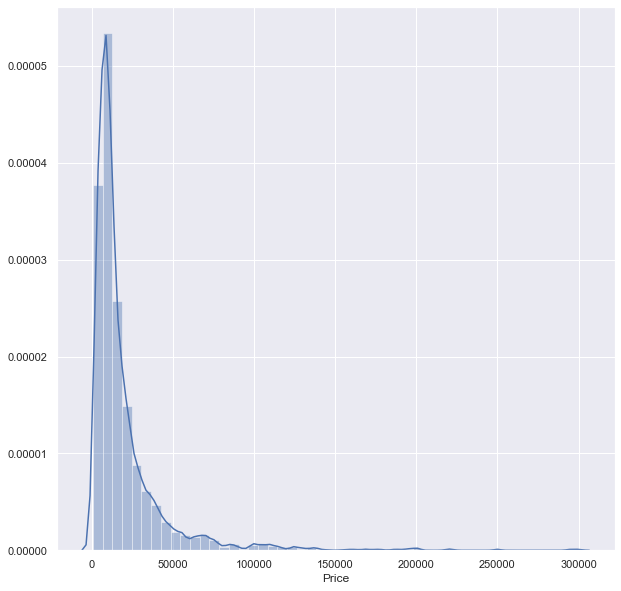

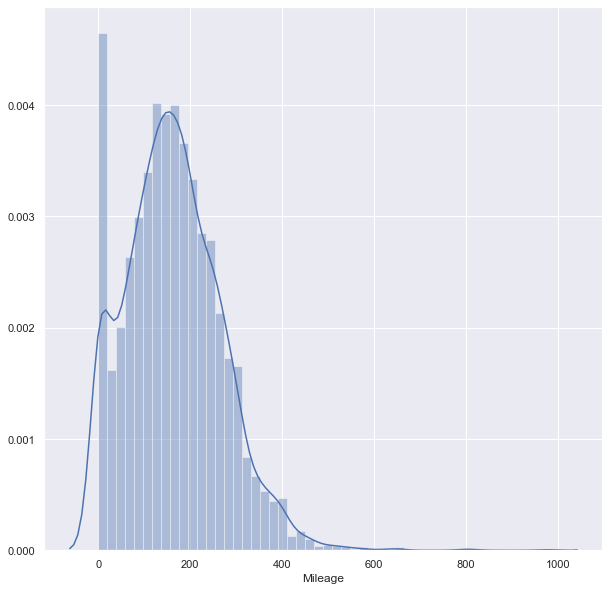

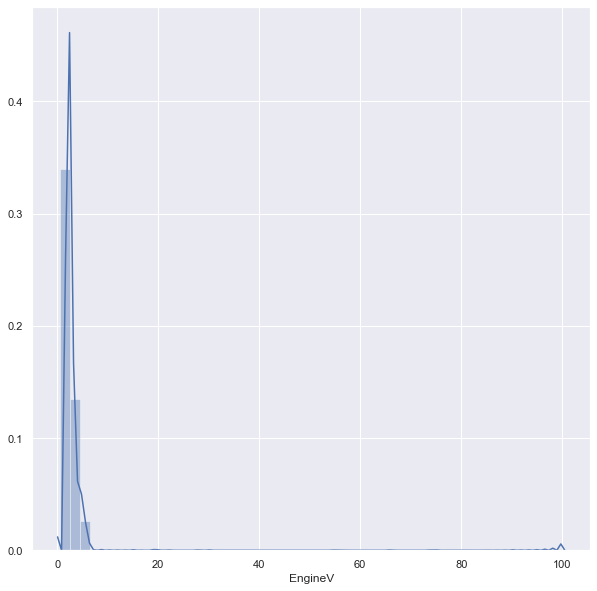

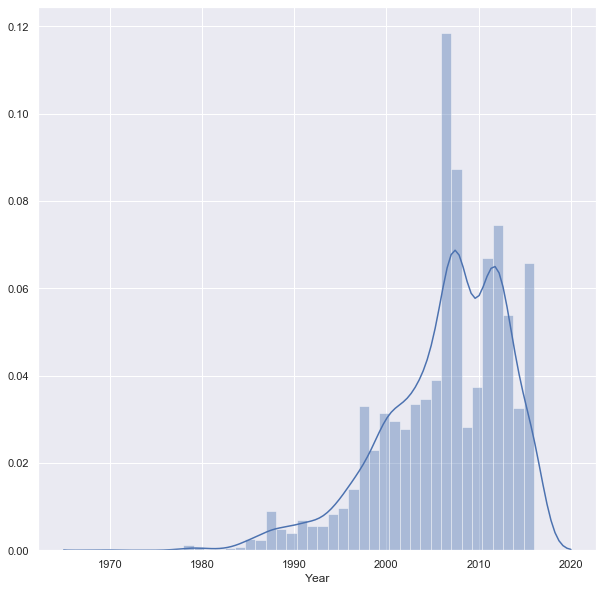

In [29]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
# We can remove the data which is variable and will be a disadvantage to our regression model
sns.distplot(dataset['Price'])
plt.show()
sns.distplot(dataset['Mileage'])
plt.show()
sns.distplot(dataset['EngineV'])
plt.show()
sns.distplot(dataset['Year'])
plt.show()

In [30]:
#summary and stats of the dataset
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [31]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
# In this way we have essentially removed the top 1% of the data about 'Price'

# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider


q = dataset['Price'].quantile(0.99)
dataset_1 = dataset[dataset['Price']<q]

q1 = dataset_1['Mileage'].quantile(0.99)
dataset_2 = dataset_1[dataset_1['Mileage']<q1]

dataset_3 = dataset_2[dataset_2['EngineV']<6.5]

q2 = dataset_3['Year'].quantile(0.01)
dataset_4 = dataset_3[dataset['Year']>q2]

dataset_4.describe(include='all')

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\DEEP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


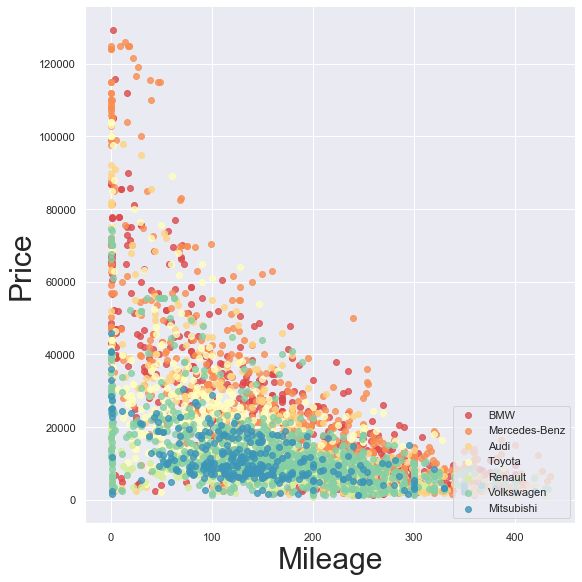

In [32]:
# scatterplot with categorical variable

sns.lmplot( x="Mileage", y="Price", data=dataset_4, fit_reg=False, hue='Brand',palette="Spectral", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Mileage', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

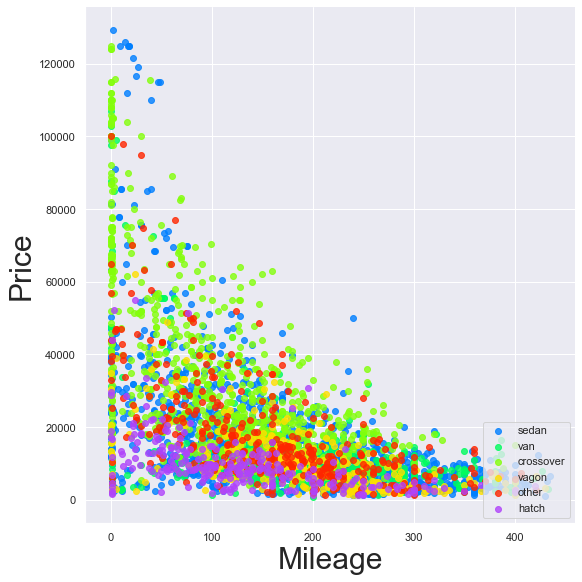

In [33]:
# scatterplot with categorical variable

sns.lmplot( x="Mileage", y="Price", data=dataset_4, fit_reg=False, hue='Body',palette="gist_ncar", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Mileage', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

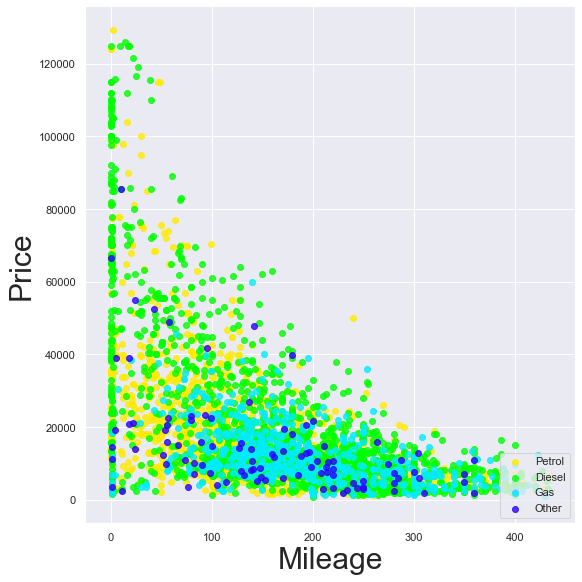

In [34]:
sns.lmplot( x="Mileage", y="Price", data=dataset_4, fit_reg=False, hue='Engine Type',palette="gist_rainbow", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Mileage', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

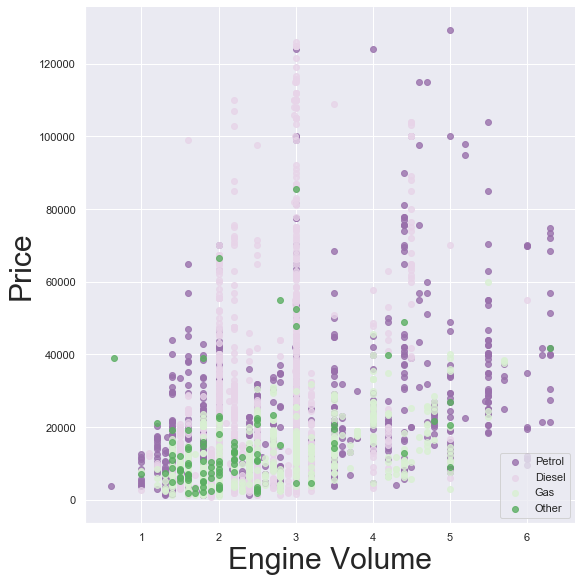

In [35]:
sns.lmplot( x="EngineV", y="Price", data=dataset_4, fit_reg=False, hue='Engine Type',palette="PRGn", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Engine Volume', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

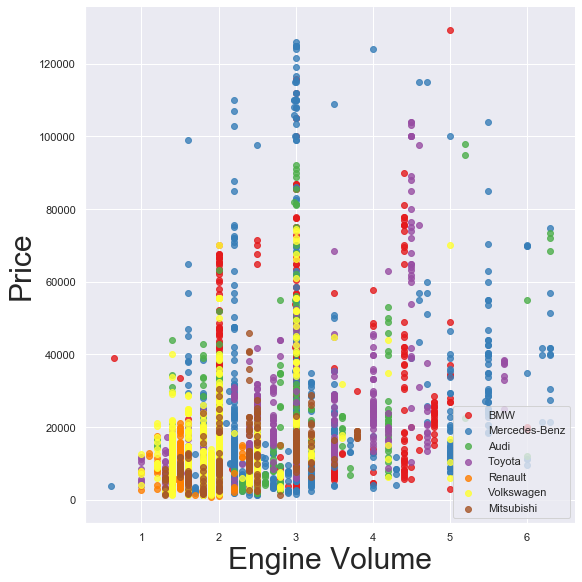

In [36]:
sns.lmplot( x="EngineV", y="Price", data=dataset_4, fit_reg=False, hue='Brand',palette="Set1", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Engine Volume', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

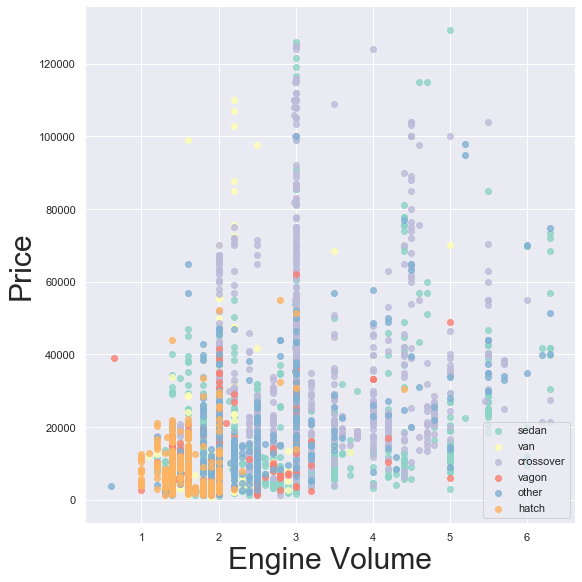

In [37]:
sns.lmplot( x="EngineV", y="Price", data=dataset_4, fit_reg=False, hue='Body',palette="Set3", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Engine Volume', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

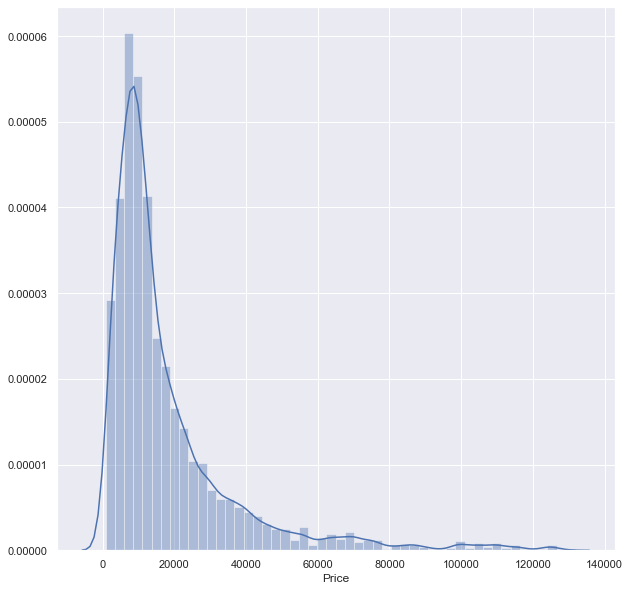

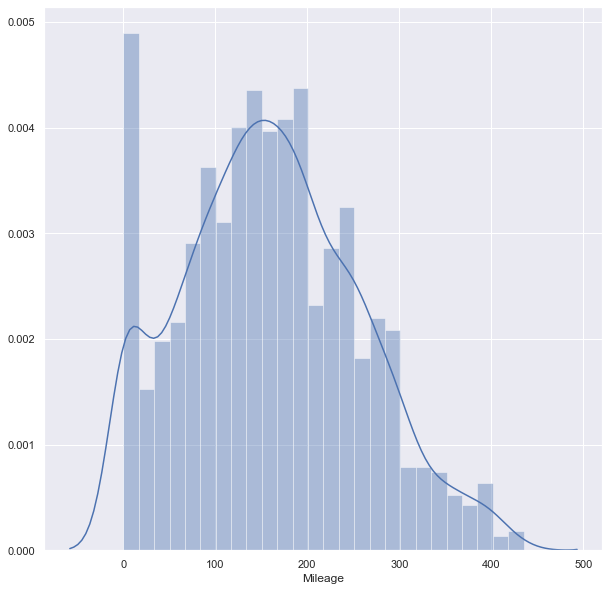

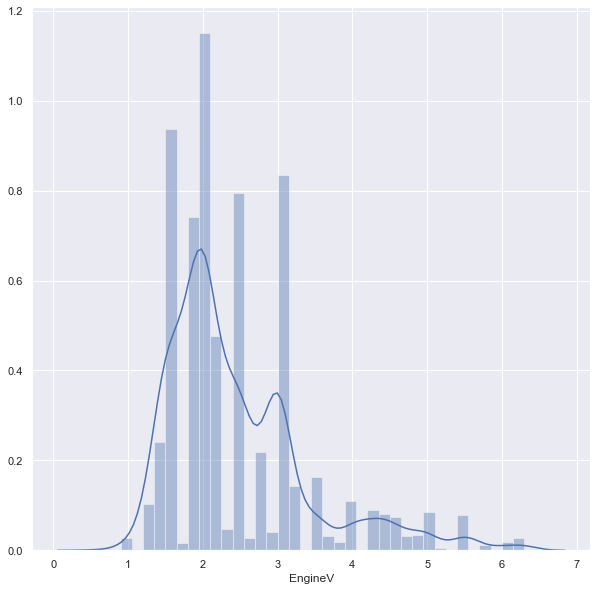

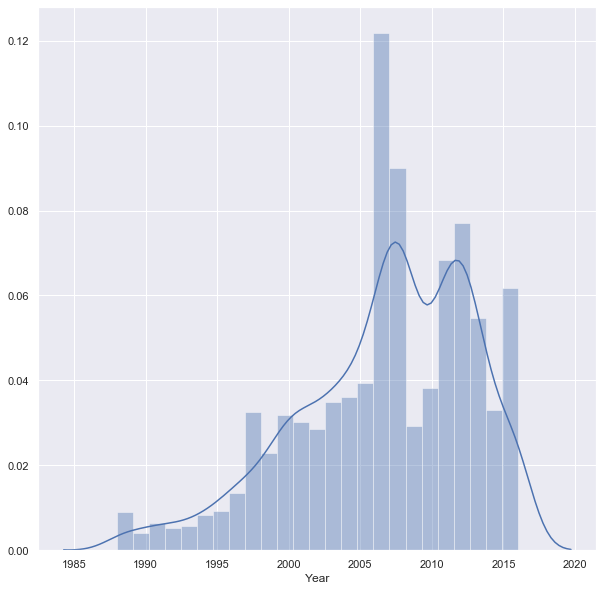

In [38]:
# Change in probability density function
sns.distplot(dataset_4['Price'])
plt.show()
sns.distplot(dataset_4['Mileage'])
plt.show()
sns.distplot(dataset_4['EngineV'])
plt.show()
sns.distplot(dataset_4['Year'])
plt.show()

In [39]:
# From the scatter plots it could be summarized that data behaves as exponential function
# Therefore, taking log based transformation will be benificial
# Let's transform 'Price' with a log transformation
log_price = np.log(dataset_4['Price'])

# Then we add it to our data frame
dataset_4['log_price'] = log_price
dataset_4

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


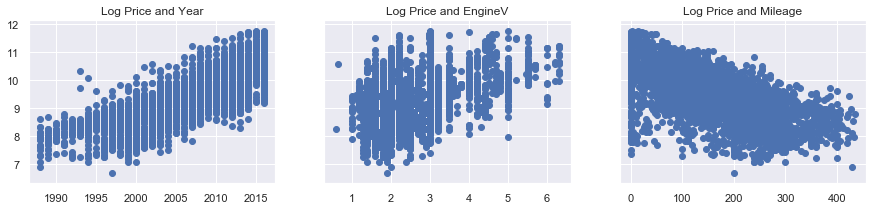

In [40]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(dataset_4['Year'],dataset_4['log_price'],cmap='Spectral')
ax1.set_title('Log Price and Year')
ax2.scatter(dataset_4['EngineV'],dataset_4['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(dataset_4['Mileage'],dataset_4['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [41]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = dataset_4[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [42]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
dataset_5 = dataset_4.drop(['Year'],axis=1)
dataset_5

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,Corolla,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,S 350,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,535,8.779557


In [43]:
#frequency count
count_1 = dataset_5['Brand'].value_counts()
print(count_1)
#frequency count
count_2 = dataset_5['Body'].value_counts()
print(count_2)
#frequency count
count_3 = dataset_5['Engine Type'].value_counts()
print(count_3)

Volkswagen       848
Mercedes-Benz    755
BMW              624
Toyota           498
Renault          432
Audi             408
Mitsubishi       302
Name: Brand, dtype: int64
sedan        1467
crossover     795
van           610
vagon         372
other         370
hatch         253
Name: Body, dtype: int64
Diesel    1807
Petrol    1393
Gas        568
Other       99
Name: Engine Type, dtype: int64


### MANUAL REGRESSION

In [44]:
# regression manual 

# mapping categories with 01234...
data_copy = dataset_5.copy()
data_copy['Brand'] = dataset_5['Brand'].map({'Volkswagen':6,'Mercedes-Benz':5,'BMW':4,'Toyota':3,'Renault':2,'Audi':1,'Mitsubishi':0})
data_copy['Body'] = dataset_5['Body'].map({'hatch':5,'other':4,'vagon':3,'van':2,'crossover':1,'sedan':0})
data_copy['Engine Type'] = dataset_5['Engine Type'].map({'Diesel':3,'Petrol':2,'Gas':1,'Other':0})

data_copy.describe()

,Brand,Price,Body,Mileage,EngineV,Engine Type,log_price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,3.652702,18194.455679,1.519524,160.542539,2.450440,2.269201,9.415703
std,1.930678,19085.855165,1.600187,95.633291,0.949366,0.802667,0.876616
min,0.000000,800.000000,0.000000,0.000000,0.600000,0.000000,6.684612
25%,2.000000,7200.000000,0.000000,91.000000,1.800000,2.000000,8.881836
50%,4.000000,11700.000000,1.000000,157.000000,2.200000,2.000000,9.367344
75%,5.000000,21700.000000,3.000000,225.000000,3.000000,3.000000,9.985068
max,6.000000,129222.000000,5.000000,435.000000,6.300000,3.000000,11.769287


In [45]:
#test regression 

yt = data_copy['log_price']
xt = data_copy[['EngineV','Mileage','Brand']]

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(xt)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(yt,x).fit()
# Print a nice summary of the regression.
results.summary()

C:\Users\DEEP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1650.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:16:36   Log-Likelihood:                -3382.9
No. Observations:                3867   AIC:                             6774.
Df Residuals:                    3863   BIC:                             6799.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2265      0.034    270.355      0.000       9.160       9.293
EngineV        0.3811      0.010     38.733      0.000       0.362       0.400
Mileage       -0.0057   9.79e-05    -58.493      0.000      -0.006      -0.006
Brand          0.0478      0.005      9.854      0.000       0.038       0.057
==============================================================================
Omnibus:                      449.614   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.338
Skew:                          -0.787   Prob(JB):                    9.68e-170
Kurtosis:                       4.534   Cond. No.                         699.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 0.38112962 -0.00572673  0.047805  ]
9.226534695391049
Regression score of this model is: 56.16068356346125


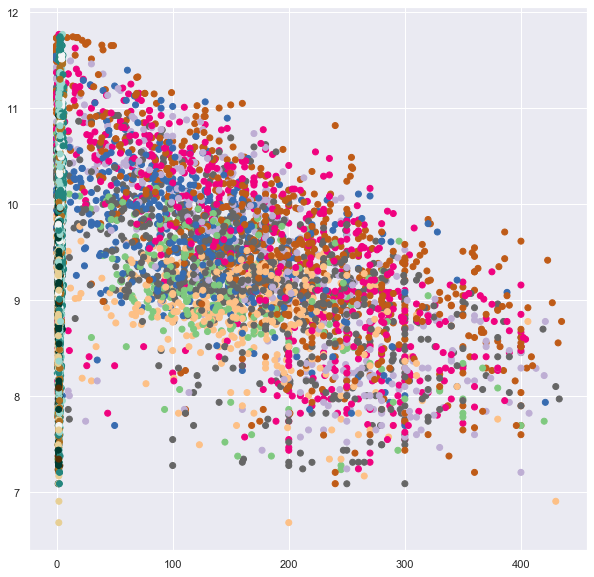

In [46]:
plt.rcParams["figure.figsize"] = (10, 10)

# Create a scatter plot of production and crops
plt.scatter(data_copy['Mileage'],data_copy['log_price'], c=data_copy['Brand'],cmap='Accent')
plt.scatter(data_copy['EngineV'],data_copy['log_price'], c=data_copy['Brand'],cmap='BrBG')

# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(xt,yt)

# Getting the coefficients of the regression
print(reg.coef_)
# Note that the output is an array

# Getting the intercept of the regression
print(reg.intercept_)
# Note that the result is a float as we usually expect a single value

# Get the R-squared of the regression
print('Regression score of this model is:', reg.score(xt,yt)*100)

In [47]:
x

,const,EngineV,Mileage,Brand
0,1.0,2.0,277,4
1,1.0,2.9,427,5
2,1.0,5.0,358,5
3,1.0,4.2,240,1
4,1.0,2.0,120,3
...,...,...,...,...
4338,1.0,2.5,163,6
4339,1.0,1.6,35,3
4340,1.0,3.0,9,5
4341,1.0,3.5,1,4


In [48]:
#creating new data frame, identical in organization x

new_data = pd.DataFrame({'const':1,'EngineV':[2.0,3.4,4.5,1.2,2.4],'Mileage':[278,163,52,256,154],
                         'Brand':[4,6,7,2,3]})
new_data = new_data[['const','EngineV','Mileage','Brand']]
print('The input dataset to be predicted:\n',new_data)

The input dataset to be predicted:
    const  EngineV  Mileage  Brand
0      1      2.0      278      4
1      1      3.4      163      6
2      1      4.5       52      7
3      1      1.2      256      2
4      1      2.4      154      3


In [51]:
#result predictions
predictions = results.predict(new_data)
prod_final = abs(predictions)
final_price = np.exp(prod_final)
print('The predicted values of the price based on above dataset are:\n',final_price)

The predicted values of the price based on above dataset are:
 0     5366.777225
1    19452.840033
2    58598.421321
3     4078.388564
4    12121.600394
dtype: float64
